In [1]:
#Credit: https://www.youtube.com/watch?v=uqomO_BZ44g&t=368s
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
import os
import numpy as np
import cv2
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
from tensorflow.keras.optimizers import RMSprop

In [3]:
#print(os.getcwd())
#img=image.load_img("Pari/training/happy/th1.jpg")
img=image.load_img("Pari3/training/happy/th11.png")

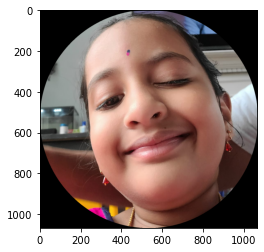

In [4]:
plt.imshow(img)

In [16]:
cv2.imread("Pari3/training/happy/th11.png").shape

(1067, 1067, 3)

In [17]:
!pip install opencv-python

You should consider upgrading via the 'c:\users\raman\anaconda3\envs\tf_cpu\python.exe -m pip install --upgrade pip' command.


In [18]:
train=ImageDataGenerator(rescale=1/255)
validation=ImageDataGenerator(rescale=1/255)

In [19]:
train_dataset=train.flow_from_directory('Pari3/training',
                                        target_size=(500,500),
                                       batch_size=3,
                                       class_mode='binary')
validation_dataset=validation.flow_from_directory('Pari3/validation',
                                        target_size=(500,500),
                                       batch_size=3,
                                       class_mode='binary')

Found 19 images belonging to 2 classes.
Found 21 images belonging to 2 classes.


In [20]:
train_dataset.class_indices

{'happy': 0, 'not-happy': 1}

In [21]:
train_dataset.classes

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [22]:
validation_dataset.classes

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [23]:
model=tf.keras.models.Sequential([tf.keras.layers.Conv2D(16,(3,3),activation='relu',input_shape=(500,500,3)),
                                 tf.keras.layers.MaxPool2D(2,2),
                                #
                                 tf.keras.layers.Conv2D(32,(3,3),activation='relu'),
                                 tf.keras.layers.MaxPool2D(2,2),
                                 #
                                  tf.keras.layers.Conv2D(64,(3,3),activation='relu'),
                                 tf.keras.layers.MaxPool2D(2,2),
                                  #
                                  tf.keras.layers.Flatten(),
                                  #
                                  tf.keras.layers.Dense(512,activation='relu'),
                                  #
                                  tf.keras.layers.Dense(1,activation='sigmoid'),
                                  
                                  
                                 ])

In [24]:
model.compile(loss='binary_crossentropy',
              optimizer =RMSprop(lr=0.001),
              metrics  =['accuracy']
             )

In [25]:
model_fit= model.fit(train_dataset,
                    steps_per_epoch=3,
                    epochs=30,
                    validation_data=validation_dataset)

Epoch 1/30
3/3 [==============================] - 4s 1s/step - loss: 74.8714 - accuracy: 0.5556 - val_loss: 5.7551 - val_accuracy: 0.5238
Epoch 2/30
3/3 [==============================] - 4s 1s/step - loss: 3.2200 - accuracy: 0.4444 - val_loss: 0.9514 - val_accuracy: 0.5238
Epoch 3/30
3/3 [==============================] - 4s 1s/step - loss: 1.7163 - accuracy: 0.7143 - val_loss: 0.7833 - val_accuracy: 0.5238
Epoch 4/30
3/3 [==============================] - 5s 2s/step - loss: 0.5628 - accuracy: 0.7778 - val_loss: 4.3856 - val_accuracy: 0.4762
Epoch 5/30
3/3 [==============================] - 4s 1s/step - loss: 1.1042 - accuracy: 0.8571 - val_loss: 0.8939 - val_accuracy: 0.5238
Epoch 6/30
3/3 [==============================] - 4s 1s/step - loss: 0.4016 - accuracy: 0.7778 - val_loss: 0.8901 - val_accuracy: 0.2381
Epoch 7/30
3/3 [==============================] - 4s 1s/step - loss: 0.3525 - accuracy: 0.8889 - val_loss: 1.0311 - val_accuracy: 0.2381
Epoch 8/30
3/3 [========================

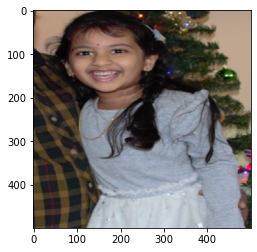

you are happy


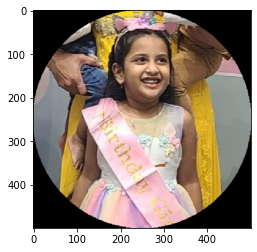

you are happy


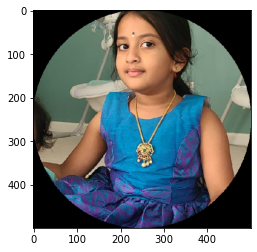

you are happy


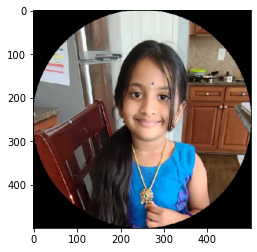

you are happy


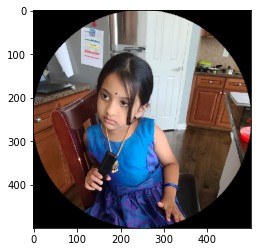

you are not happy


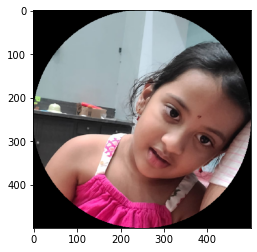

you are not happy


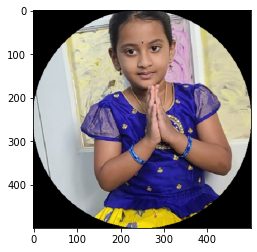

you are happy


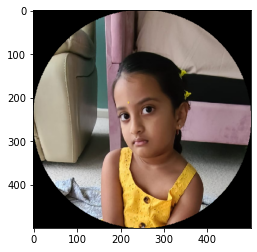

you are not happy


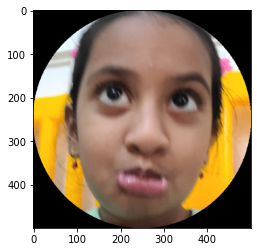

you are happy


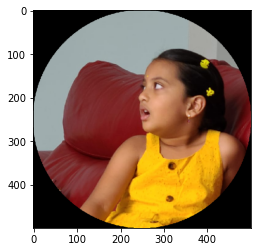

you are not happy


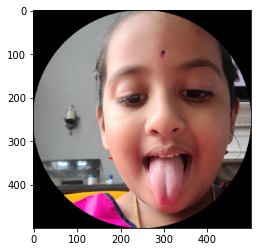

you are happy


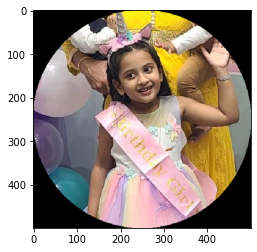

you are happy


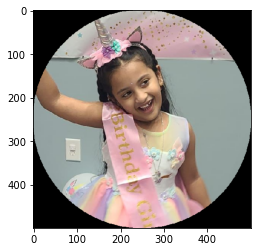

you are happy


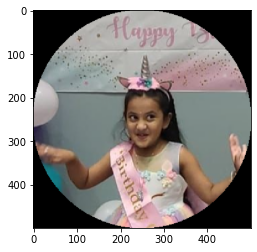

you are happy


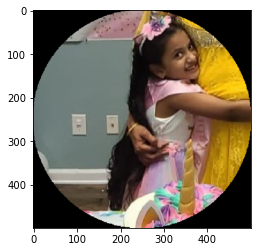

you are happy


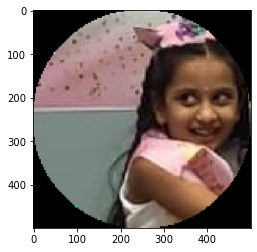

you are happy


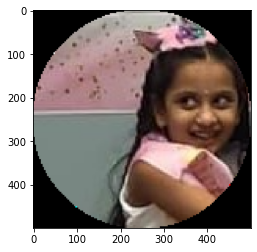

you are happy


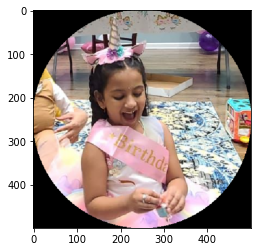

you are not happy


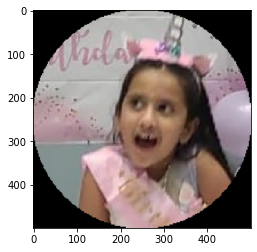

you are happy


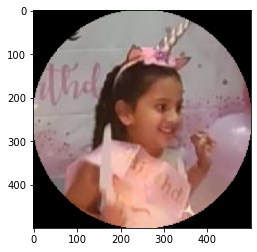

you are happy


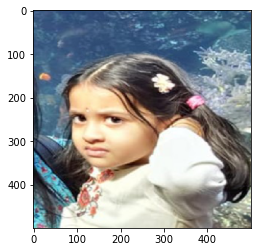

you are not happy


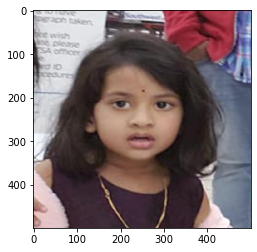

you are not happy


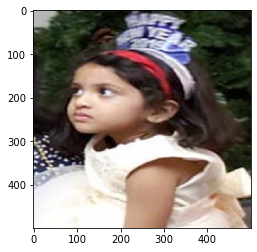

you are not happy


In [34]:
dir_path='Pari3/testing'
#dir_path='Pari/testing'
#dir_path='Not-smiling'
#dir_path='smiling'
for i in os.listdir(dir_path):
    #print ('test' + i)
    img=image.load_img(dir_path+"//"+i,target_size=(500,500))
    plt.imshow(img)
    plt.show()
    X = image.img_to_array(img)
    X = np.expand_dims(X,axis=0)
    images=np.vstack([X])
    val = model.predict(images)
    if val==1:
        print("you are not happy")
    else:
        print("you are happy")